# **Bibliotecas**

In [106]:
###################################################################################################
#  Bibliotecas gerais
#  Instalação

#!pip install xlrd

In [107]:
###################################################################################################
#  Bibliotecas gerais
#  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
from numpy.linalg import matrix_rank

In [108]:
###################################################################################################
#  Bibliotecas gráfica
#  Instalação

#!pip install -U plotly
# !pip install plotly==4.8.1

# organização da planilha excel

#!pip install nltk

# Exportando figuras com melhores resoluções

#!pip install -U kaleido

#!add-apt-repository -y ppa:cran/poppler
#!apt-get update
#!apt-get install -y libpoppler-cpp-dev
#!apt-get install poppler-utils

In [109]:
###################################################################################################
#  Bibliotecas gráfica
# 
# 

import plotly.express as px
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Diretório de imagens
import os
if not os.path.exists("images"):
    os.mkdir("images")


## **Controle**

In [110]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# Instalação

#!git clone https://github.com/python-control/python-control.git

#!pip install slycot   # optional
#!pip install control



In [111]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# 

import control
from control import impulse_response, step_response


# **Funções proprietárias**

In [112]:
def graphics_plot(x, y, y_name, yaxes_title, title='Title', bins=1, x_tick=1, save=False):

  '''
  y = [y1, y2, y3, y4]

  y_name = ['y1 name', 'y2 name', 'y3 name', 'y4 name']

  bins = number of bins for x scale

  title = 'Title'

  yaxes_title = ['Title yaxes1', 'Title yaxes2', 'Title yaxes3', 'Title yaxes4']

  x_tick = dtick for axis x

  save = True -> save graphics as image (images/title.eps) 
  '''

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{'secondary_y': True}]])

  # Markers
  markers = ['circle','star','diamond','x']

  # Lines
  dash = ['dash','dot','dashdot']

  for i, v in enumerate(y):
    
    if (len(yaxes_title) == 1) | (i < len(y) - 1):
      on = False
    else:
      on = True

    if i == 0:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2)),
          # line_shape='spline'),
          secondary_y=False)
      
    else:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2,dash=dash[i-1])),
          # line_shape='spline'),
          secondary_y=on)
  
  # Add figure title
  fig.update_layout(title_text=title)
  
  # Set x-axis title
  fig.update_xaxes(title_text='Ano relativo')

  # Set y-axes titles
  if len(yaxes_title) > 1:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)
    fig.update_yaxes(title_text='<b>'+ yaxes_title[1] +'</b>', secondary_y=True)
  else:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)

  
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
  fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

  fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

  fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )

  fig.update_layout(
      xaxis=dict(
      tickmode='linear',
      tick0=0,
      dtick=x_tick
  ))

  fig.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    y=1.01,
    xanchor='right',
    x=0.95
  ))

  fig.show()

  if save:
    fig.write_image('images/'+title+'.eps')

## **Geração de elipses para o resultado do GMM**

In [113]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
   
    ax = ax or plt.gca()
    
    # Rotaciona o conjunto de dados para alinhamento com a convariância
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Cria e elipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# **Dados**

In [114]:
###################################################################################################
# Lendo os dados

vogais = pd.read_csv("testandodetector.csv")
vogais.head()

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3
0,1,1,1,IY,160.0,240.0,2280.0,2850.0
1,1,1,1,IY,186.0,280.0,2400.0,2790.0
2,1,1,2,IH,203.0,390.0,2030.0,2640.0
3,1,1,2,IH,192.0,310.0,1980.0,2550.0
4,1,1,3,EH,161.0,490.0,1870.0,2420.0


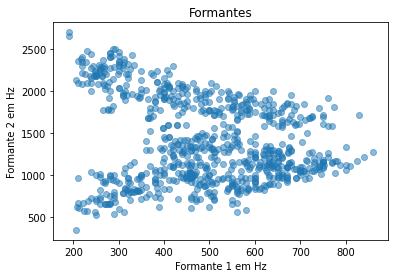

In [115]:
###################################################################################################
# Análise elementar dos dados

### Análise por genero

Homem   = vogais['Genero'] == 1
Mulher  = vogais['Genero'] == 2
Crianca = vogais['Genero'] == 3

vogais[Homem].describe()
vogais[Mulher].describe()
vogais[Crianca].describe()

### Separando os dataframes por genero

vogaisH = vogais[Homem]
vogaisM = vogais[Mulher]
vogaisC = vogais[Crianca]

### Capturando os tipos de fonemas

fonemas = vogais['Fonema'].unique()

### Analisando o espalhamento ntre os homens para o primeiro fonema

formante1 = np.array(vogais['f1'][Homem])
formante2 = np.array(vogais['f2'][Homem])

### Gráficamente

plt.scatter(formante1, formante2, alpha=0.5)
plt.title('Formantes')
plt.xlabel('Formante 1 em Hz')
plt.ylabel('Formante 2 em Hz')
plt.show()

In [116]:
###################################################################################################
# Codifica os fonemas
# !pip install sklearn
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
vogais["Codigo"] = ord_enc.fit_transform(vogais[["Fonema"]])

In [117]:
###################################################################################################
# Visualiza os dados

import plotly.express as px
df = vogaisH
plt.figure(figsize=(15,7))
fig = px.scatter(df, x="f1", y="f2", color="Fonema")

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )
fig.show()

<Figure size 1080x504 with 0 Axes>

# **Separando os fonemas**

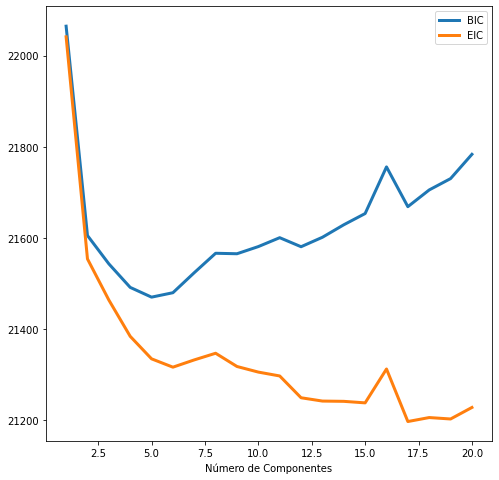

In [118]:
Freq = np.array([formante1,formante2]).T

###################################################################################################
# Gaussian Mixtures

from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Freq)
          for n in n_components]
plt.figure(figsize = (8,8))
plt.plot(n_components, [m.bic(Freq) for m in models], label='BIC',linewidth = "3")
plt.plot(n_components, [m.aic(Freq) for m in models], label='EIC',linewidth = "3")
plt.legend(loc='best')
plt.xlabel('Número de Componentes');

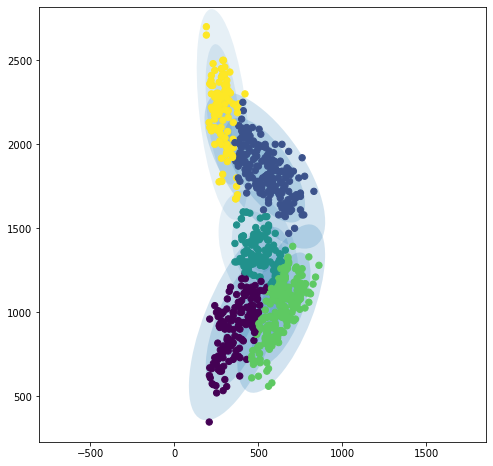

In [119]:
###################################################################################################
# Gaussian Mixtures - visualização

from matplotlib.patches import Ellipse

gmm2 = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
plt.figure(figsize = (8,8))
plot_gmm(gmm2, Freq)

In [120]:
gmm2.fit_predict(Freq, y=None)

array([4, 4, 1, 4, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 0, 4, 4, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1,
       2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4, 1, 4, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3,
       0, 3, 0, 0, 0, 0, 2, 2, 4, 4, 4, 4, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3,
       0, 2, 0, 0, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2,
       4, 4, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4,
       1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4, 4, 1, 4, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 4,

In [121]:
vogais.head(8)

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
0,1,1,1,IY,160.0,240.0,2280.0,2850.0,22.0
1,1,1,1,IY,186.0,280.0,2400.0,2790.0,22.0
2,1,1,2,IH,203.0,390.0,2030.0,2640.0,21.0
3,1,1,2,IH,192.0,310.0,1980.0,2550.0,21.0
4,1,1,3,EH,161.0,490.0,1870.0,2420.0,19.0
5,1,1,3,*EH,155.0,570.0,1700.0,2600.0,4.0
6,1,1,4,*AE,140.0,560.0,1820.0,2660.0,1.0
7,1,1,4,AE,180.0,630.0,1700.0,2550.0,16.0


# Fazendo detecção de vogais
## separando o dataframe por genero e por vogais para calcular os intervalos válidos de f0, f1, f2 e f3

In [122]:
vogais['Fonema'].unique()

array(['IY', 'IH', 'EH', '*EH', '*AE', 'AE', 'AH', 'AA', '*AO', 'UH',
       'UW', 'ER', '*AH', 'AO', '*UW', '*IH', '*AA', '*UH', '*IY', '*ER',
       '1', '2', '3', '4', '5'], dtype=object)

In [123]:
vogais['Fonema'].replace(to_replace = 1,value= 'AA', inplace = True)
#vogais['Fonema'].replace(to_replace = '*AA',value= 'AA', inplace = True)
#vogais['Fonema'].replace(to_replace = '*AE',value= 'AA', inplace = True)
vogais['Fonema'].replace(to_replace = '*AH',value= 'AA', inplace = True)

#vogais['Fonema'].replace(to_replace = 'AE',value= 'AA', inplace = True)
vogais['Fonema'].replace(to_replace = 'AH',value= 'AA', inplace = True)



vogais['Fonema'].replace(to_replace = 2,value= 'EE', inplace = True)
vogais['Fonema'].replace(to_replace = '*EH',value= 'EE', inplace = True)
vogais['Fonema'].replace(to_replace = 'EH',value= 'EE', inplace = True)
#vogais['Fonema'].replace(to_replace = '*ER',value= 'EE', inplace = True)
#vogais['Fonema'].replace(to_replace = 'ER',value= 'EE', inplace = True)


vogais['Fonema'].replace(to_replace = 3,value= 'II', inplace = True)
vogais['Fonema'].replace(to_replace = 'IY',value= 'II', inplace = True)
#vogais['Fonema'].replace(to_replace = 'IH',value= 'II', inplace = True)
#vogais['Fonema'].replace(to_replace = '*IH',value= 'II', inplace = True)
vogais['Fonema'].replace(to_replace = '*IY',value= 'II', inplace = True)

vogais['Fonema'].replace(to_replace = 4,value= 'OO', inplace = True)
vogais['Fonema'].replace(to_replace = 'AO',value= 'OO', inplace = True)
vogais['Fonema'].replace(to_replace = '*AO',value= 'OO', inplace = True)

vogais['Fonema'].replace(to_replace = 5,value= 'UU', inplace = True)
#vogais['Fonema'].replace(to_replace = '*UH',value= 'UU', inplace = True)
vogais['Fonema'].replace(to_replace = '*UW',value= 'UU', inplace = True)
#vogais['Fonema'].replace(to_replace = 'UH',value= 'UU', inplace = True)
vogais['Fonema'].replace(to_replace = 'UW',value= 'UU', inplace = True)

In [124]:
vogais['Fonema'].unique()

array(['II', 'IH', 'EE', '*AE', 'AE', 'AA', 'OO', 'UH', 'UU', 'ER', '*IH',
       '*AA', '*UH', '*ER', '1', '2', '3', '4', '5'], dtype=object)

In [125]:
dfHomem = vogais.loc[vogais['Genero'] == 1]

# Intervalos formantes e f0  vogal A

In [126]:
# Separando dataframe para vogais com o fonema AA
dfHomemA = dfHomem.loc[dfHomem['Fonema'] == "AA"]
dfHomemA

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
8,1,1,5,AA,144.0,590.0,1250.0,2620.0,17.0
9,1,1,5,AA,148.0,620.0,1300.0,2530.0,17.0
10,1,1,6,AA,148.0,740.0,1070.0,2490.0,15.0
11,1,1,6,AA,170.0,800.0,1060.0,2640.0,15.0
28,1,2,5,AA,140.0,650.0,1080.0,2420.0,2.0
...,...,...,...,...,...,...,...,...,...
631,1,32,6,AA,117.0,713.0,1180.0,2200.0,15.0
648,1,33,5,AA,143.0,672.0,1272.0,2640.0,17.0
649,1,33,5,AA,146.0,658.0,1241.0,2560.0,17.0
650,1,33,6,AA,130.0,780.0,1170.0,2640.0,15.0


In [127]:
from scipy.io import savemat

media = dfHomemA.mean()
desvPad = dfHomemA.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesAmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesAmat

mdic = {"A": formantesAmat, "label": "experiment"}

savemat("matlab_matrixA.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\2260579539.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\2260579539.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# Intervalos formantes e f0  vogal E

In [128]:
# Separando dataframe para vogais com o fonema EE
dfHomemE = dfHomem.loc[dfHomem['Fonema'] == "EE"]
dfHomemE

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
4,1,1,3,EE,161.0,490.0,1870.0,2420.0,19.0
5,1,1,3,EE,155.0,570.0,1700.0,2600.0,4.0
24,1,2,3,EE,136.0,500.0,1760.0,2590.0,19.0
25,1,2,3,EE,135.0,510.0,1710.0,2380.0,4.0
44,1,3,3,EE,100.0,550.0,1810.0,2500.0,19.0
...,...,...,...,...,...,...,...,...,...
605,1,31,3,EE,111.0,555.0,1870.0,2540.0,19.0
624,1,32,3,EE,133.0,574.0,1840.0,2260.0,4.0
625,1,32,3,EE,133.0,563.0,1960.0,2450.0,4.0
644,1,33,3,EE,125.0,525.0,1988.0,2610.0,4.0


In [129]:
media = dfHomemE.mean()
desvPad = dfHomemE.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesEmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesEmat

mdic = {"E": formantesEmat, "label": "experiment"}

savemat("matlab_matrixE.mat", mdic)
formantesEmat

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\499482407.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\499482407.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



[[93.61921214621412, 163.1989696719677],
 [408.75803253086644, 643.635906863073],
 [1626.4239423313206, 2082.3942394868614],
 [2216.4414830534915, 2746.4373048252965]]

# Intervalos formantes e f0  vogal I

In [130]:
# Separando dataframe para vogais com o fonema II
dfHomemI = dfHomem.loc[dfHomem['Fonema'] == "II"]
dfHomemI

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
0,1,1,1,II,160.0,240.0,2280.0,2850.0,22.0
1,1,1,1,II,186.0,280.0,2400.0,2790.0,22.0
20,1,2,1,II,147.0,220.0,2220.0,2910.0,22.0
21,1,2,1,II,148.0,210.0,2360.0,3250.0,22.0
40,1,3,1,II,105.0,250.0,2180.0,2680.0,22.0
...,...,...,...,...,...,...,...,...,...
601,1,31,1,II,120.0,300.0,2350.0,3000.0,22.0
620,1,32,1,II,146.0,292.0,2500.0,3150.0,22.0
621,1,32,1,II,133.0,266.0,2370.0,3100.0,22.0
640,1,33,1,II,143.0,286.0,2415.0,2860.0,22.0


In [131]:
media = dfHomemI.mean()
desvPad = dfHomemI.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesImat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesImat

mdic = {"I": formantesImat, "label": "experiment"}

savemat("matlab_matrixI.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\4225988927.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\4225988927.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# Intervalos formantes e f0  vogal O

In [132]:
# Separando dataframe para vogais com o fonema OO
dfHomemO = dfHomem.loc[dfHomem['Fonema'] == "OO"]
dfHomemO

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
12,1,1,7,OO,161.0,600.0,970.0,2280.0,3.0
13,1,1,7,OO,158.0,660.0,980.0,2220.0,3.0
32,1,2,7,OO,149.0,580.0,580.0,2470.0,18.0
33,1,2,7,OO,140.0,560.0,560.0,2410.0,18.0
52,1,3,7,OO,92.0,550.0,870.0,2300.0,18.0
...,...,...,...,...,...,...,...,...,...
613,1,31,7,OO,116.0,538.0,816.0,2450.0,18.0
632,1,32,7,OO,125.0,625.0,875.0,2180.0,18.0
633,1,32,7,OO,115.0,700.0,1000.0,2250.0,3.0
652,1,33,7,OO,138.0,633.0,891.0,2500.0,3.0


In [133]:
media = dfHomemO.mean()
desvPad = dfHomemO.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesOmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesOmat

mdic = {"O": formantesOmat, "label": "experiment"}

savemat("matlab_matrixO.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\4261808303.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\4261808303.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# Intervalos formantes e f0  vogal U

In [134]:
# Separando dataframe para vogais com o fonema UU
dfHomemU = dfHomem.loc[dfHomem['Fonema'] == "UU"]
dfHomemU

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
16,1,1,9,UU,160.0,240.0,1040.0,2150.0,24.0
17,1,1,9,UU,157.0,270.0,930.0,2280.0,24.0
36,1,2,9,UU,140.0,280.0,650.0,3300.0,24.0
37,1,2,9,UU,137.0,260.0,660.0,3300.0,24.0
56,1,3,9,UU,112.0,340.0,950.0,2240.0,24.0
...,...,...,...,...,...,...,...,...,...
617,1,31,9,UU,125.0,350.0,1000.0,2250.0,24.0
636,1,32,9,UU,125.0,350.0,980.0,2200.0,24.0
637,1,32,9,UU,133.0,320.0,918.0,2100.0,24.0
656,1,33,9,UU,160.0,320.0,960.0,2240.0,9.0


In [135]:
media = dfHomemU.mean()
desvPad = dfHomemU.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesUmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesUmat

mdic = {"U": formantesUmat, "label": "experiment"}

savemat("matlab_matrixU.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\3642215726.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_1584\3642215726.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# **Referências**

https://www.fon.hum.uva.nl/praat/

https://rdrr.io/cran/phonTools/man/pb52.html#heading-3

http://my.ilstu.edu/~jsawyer/consonantsvowels3/consonantsvowels24.html